In [1]:
import pandas as pd


In [2]:
dataset=pd.read_csv("Preprocessed_Placement.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
dataset.drop('sl_no',inplace=True,axis=1)

In [6]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


Dependent Sample / Paired T-Test

Same Group / Different Conditions

Male / SSC vs HSC

In [14]:
from scipy.stats import ttest_rel

dataset=dataset.dropna()

male_ssc = dataset.loc[dataset['gender'] == 'M', 'ssc_p']

male_hsc = dataset.loc[dataset['gender']=='M','hsc_p']


ttest_rel(male_ssc,male_hsc)


TtestResult(statistic=np.float64(0.6852881050898076), pvalue=np.float64(0.49431164600731514), df=np.int64(138))

<Axes: >

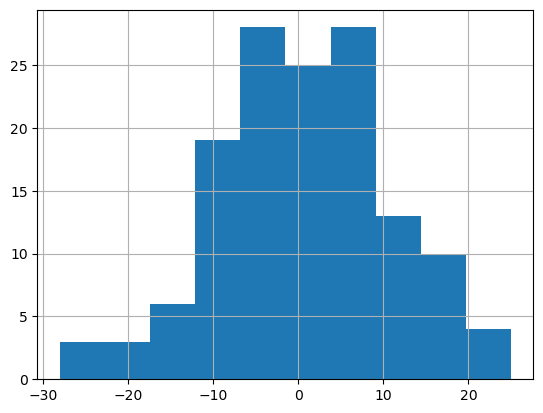

In [13]:
male_ssc = dataset.loc[dataset['gender'] == 'M', 'ssc_p']

male_hsc = dataset.loc[dataset['gender']=='M','hsc_p']


(male_ssc - male_hsc).hist()

In [15]:
from scipy.stats import ttest_rel


clean_data = dataset.dropna(subset=['hsc_s', 'mba_p', 'etest_p'])


mba = clean_data.loc[clean_data['hsc_s'] == 'Commerce', 'mba_p']
etest = clean_data.loc[clean_data['hsc_s'] == 'Commerce', 'etest_p']


result = ttest_rel(mba.values, etest.values)

print(result)




TtestResult(statistic=np.float64(-7.868552092606871), pvalue=np.float64(2.462926468454984e-12), df=np.int64(112))


<Axes: >

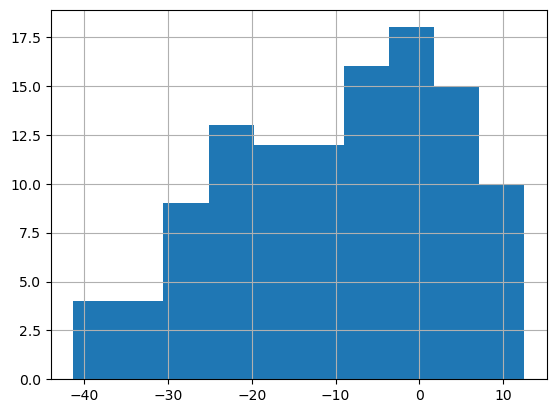

In [12]:
mba = clean_data.loc[clean_data['hsc_s'] == 'Commerce', 'mba_p']
etest = clean_data.loc[clean_data['hsc_s'] == 'Commerce', 'etest_p']

(mba - etest).hist()

In [19]:
from scipy.stats import ttest_rel


clean_data = dataset.dropna(subset=['degree_p', 'mba_p', 'gender'])


degree = clean_data.loc[clean_data['gender'] == 'F', 'degree_p']
mba = clean_data.loc[clean_data['gender'] == 'F', 'mba_p']

result = ttest_rel(degree,mba)

print(result)


TtestResult(statistic=np.float64(3.821810221815416), pvalue=np.float64(0.00027143257935959936), df=np.int64(75))


<Axes: >

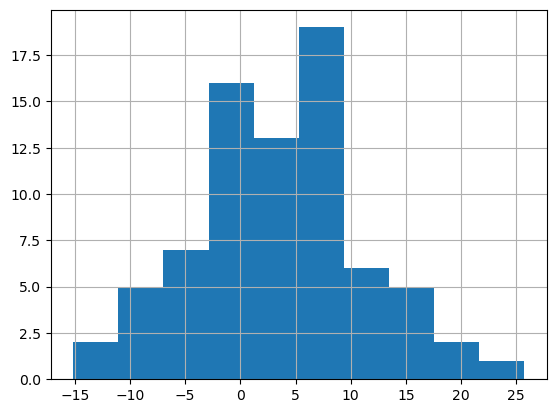

In [20]:
degree = clean_data.loc[clean_data['gender'] == 'F', 'degree_p']
mba = clean_data.loc[clean_data['gender'] == 'F', 'mba_p']

(degree - mba).hist()

In [21]:
from scipy.stats import ttest_rel


clean_data = dataset.dropna(subset=['degree_t', 'etest_p', 'mba_p'])


etest = clean_data.loc[clean_data['degree_t'] == 'Sci&Tech', 'etest_p']
mba = clean_data.loc[clean_data['degree_t'] == 'Sci&Tech', 'mba_p']

result = ttest_rel(etest,mba)

print(result)

TtestResult(statistic=np.float64(5.0049844583693615), pvalue=np.float64(5.517920600505392e-06), df=np.int64(58))


<Axes: >

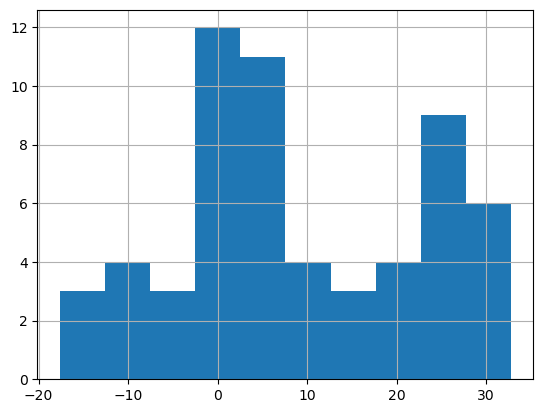

In [22]:
etest = clean_data.loc[clean_data['degree_t'] == 'Sci&Tech', 'etest_p']
mba = clean_data.loc[clean_data['degree_t'] == 'Sci&Tech', 'mba_p']

(etest - mba).hist()